In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
news = pd.read_csv("OnlineNewsPopularity.csv")

# Cleaning dataset

In [4]:
news.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [5]:
news.drop(["url", " timedelta"], axis = 1, inplace = True)

In [6]:
news.head()

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               4.680365  ...                0.100000   
1          0.0               4.913725  ...                0.033333   
2          0.0               4.393365  ...                0.100000   
3          0.0               4.404896  ...                0.136364   
4          0.0               4.682836  ...                0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 59 columns]

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [8]:
news.describe()

n_tokens_title   n_tokens_content   n_unique_tokens  \
count     39644.000000       39644.000000      39644.000000   
mean         10.398749         546.514731          0.548216   
std           2.114037         471.107508          3.520708   
min           2.000000           0.000000          0.000000   
25%           9.000000         246.000000          0.470870   
50%          10.000000         409.000000          0.539226   
75%          12.000000         716.000000          0.608696   
max          23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

       ...   min_positive_polarity   max_positive_polarity  \
count  ...            39644.000000            39644.000000   
mean   ...                0.095446                0.756728   
std    ...                0.071315                0.247786   
min    ...                0.000000                0.000000   
25%    ...                0.050000                0.600000   
50%    ...                0.100000                0.800000   
75%    ...                0.100000                1.000000   
max    ...                1.000000                1.000000   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                -0.259524               -0.521944               -0.107500   
std                  0.127726                0.290290                0.095373   
min                 -1.000000               -1.000000               -1.000000   
25%                 -0.328383               -0.700000               -0.125000   
50%                 -0.253333               -0.500000               -0.100000   
75%                 -0.186905               -0.300000               -0.050000   
max                  0.000000                0.000000                0.000000   

        title_subjectivity   title_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.282353                   0.071425   
std               0.324247                   0.265450   
min               0.000000                  -1.000000   
25%               0.000000                   0.000000   
50%               0.150000                   0.000000   
75%               0.500000                   0.150000   
max               1.000000                   1.000000   

        abs_title_subjectivity   abs_title_sentiment_polarity         shares  
count             39644.000000                   39644.000000   39644.000000  
mean                  0.341843                       0.156064    3395.380184  
std                   0.188791                       0.226294   11626.950749  
min  

In [9]:
news.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [10]:
news.shape

(39644, 59)

## Removing empty spaces at the beginning of each column name

In [11]:
news.columns = news.columns.str.lstrip()

In [12]:
news.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [13]:
news.shares

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [14]:
news.shares.min()

1

In [15]:
news.shares.max()

843300

In [16]:
news.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

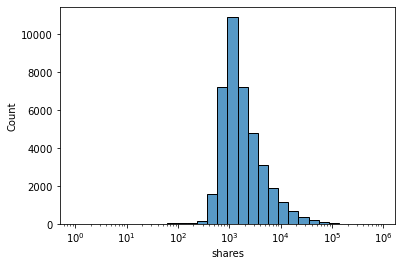

In [17]:
sns.histplot(data = news, x = "shares", log_scale= True, bins = 30)

plt.show()

In [18]:
def sh_class(news):
    if news["shares"] <= 100:
        return "bad"
    elif (news["shares"] > 100) & (news["shares"] <= 1000):
        return "low"
    elif (news["shares"] > 1000) & (news["shares"] <= 3000):
        return "medium"
    elif (news["shares"] > 3000) & (news["shares"] <= 10000):
        return "high"
    elif (news["shares"] > 10000):
        return "v_high"

In [19]:
news["shares_class"] = news.apply(lambda news: sh_class(news), axis = 1)

In [20]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 60 columns]

## removing columns with unknown content

In [21]:
news.drop(["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"], axis = 1, inplace = True)

In [22]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

In [23]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [24]:
news.isna().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

In [25]:
news.to_csv("news.csv", index = False)

# EDA

## Correlation matrix

In [52]:
news = pd.read_csv("news.csv")

In [53]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

In [5]:
news_corr = news.corr()
news_corr

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.018160   
n_tokens_content                     0.018160          1.000000   
n_unique_tokens                     -0.005318         -0.004737   
n_non_stop_words                    -0.004754          0.017512   
n_non_stop_unique_tokens            -0.005420          0.000373   
num_hrefs                           -0.053496          0.423065   
num_self_hrefs                      -0.014856          0.304682   
num_imgs                            -0.008858          0.342600   
num_videos                           0.051460          0.103699   
average_token_length                -0.071403          0.167789   
num_keywords                        -0.006077          0.072845   
data_channel_is_lifestyle           -0.070815          0.037548   
data_channel_is_entertainment        0.132791          0.060200   
data_channel_is_bus                 -0.023902         -0.006105   
data_channel_is_socmed              -0.090394          0.033424   
data_channel_is_tech                -0.046716          0.025408   
data_channel_is_world                0.049223          0.055989   
kw_min_min                          -0.110672         -0.054345   
kw_max_min                          -0.005890          0.000066   
kw_avg_min                          -0.031400         -0.003545   
kw_min_max                           0.012926         -0.022786   
kw_max_max                           0.120841          0.058860   
kw_avg_max                           0.115746         -0.096460   
kw_min_avg                          -0.002370         -0.022286   
kw_max_avg                           0.006918         -0.030496   
kw_avg_avg                           0.004296         -0.079624   
self_reference_min_shares           -0.004563         -0.030686   
self_reference_max_shares            0.000128          0.025657   
self_reference_avg_sharess           0.000661         -0.013809   
weekday_is_monday                    0.004274         -0.002484   
weekday_is_tuesday                   0.009322         -0.004027   
weekday_is_wednesday                 0.008935         -0.016891   
weekday_is_thursday                 -0.015472         -0.007395   
weekday_is_friday                   -0.002015         -0.015949   
weekday_is_saturday                 -0.015013          0.034538   
weekday_is_sunday                    0.006289          0.036394   
is_weekend                          -0.005996          0.052024   
global_subjectivity                 -0.056804          0.127879   
global_sentiment_polarity           -0.072226          0.021937   
global_rate_positive_words          -0.064951          0.133979   
global_rate_negative_words           0.015530          0.125013   
rate_positive_words                 -0.066589          0.098960   
rate_negative_words                  0.034186          0.101053   
avg_positive_polarity               -0.049619          0.135123   
min_positive_polarity               -0.025069         -0.261493   
max_positive_polarity               -0.021662          0.415706   
avg_negative_polarity               -0.017096         -0.130375   
min_negative_polarity               -0.029146         -0.450603   
max_negative_polarity                0.011425          0.225870   
title_subjectivity                   0.077245          0.004484   
title_sentiment_polarity             0.000240          0.023358   
abs_title_subjectivity              -0.146954          0.007136   
abs_title_sentiment_polarity         0.040550          0.013439   
shares                               0.008783          0.002459   

                               n_unique_tokens  n_non_stop_words  \
n_tokens_title                       -0.005318         -0.004754   
n_tokens_content                     -0.004737          0.017512   
n_unique_tokens                       1.000000          0.999572   
n_non_stop_words                      0.999572          1.000000   
n_non

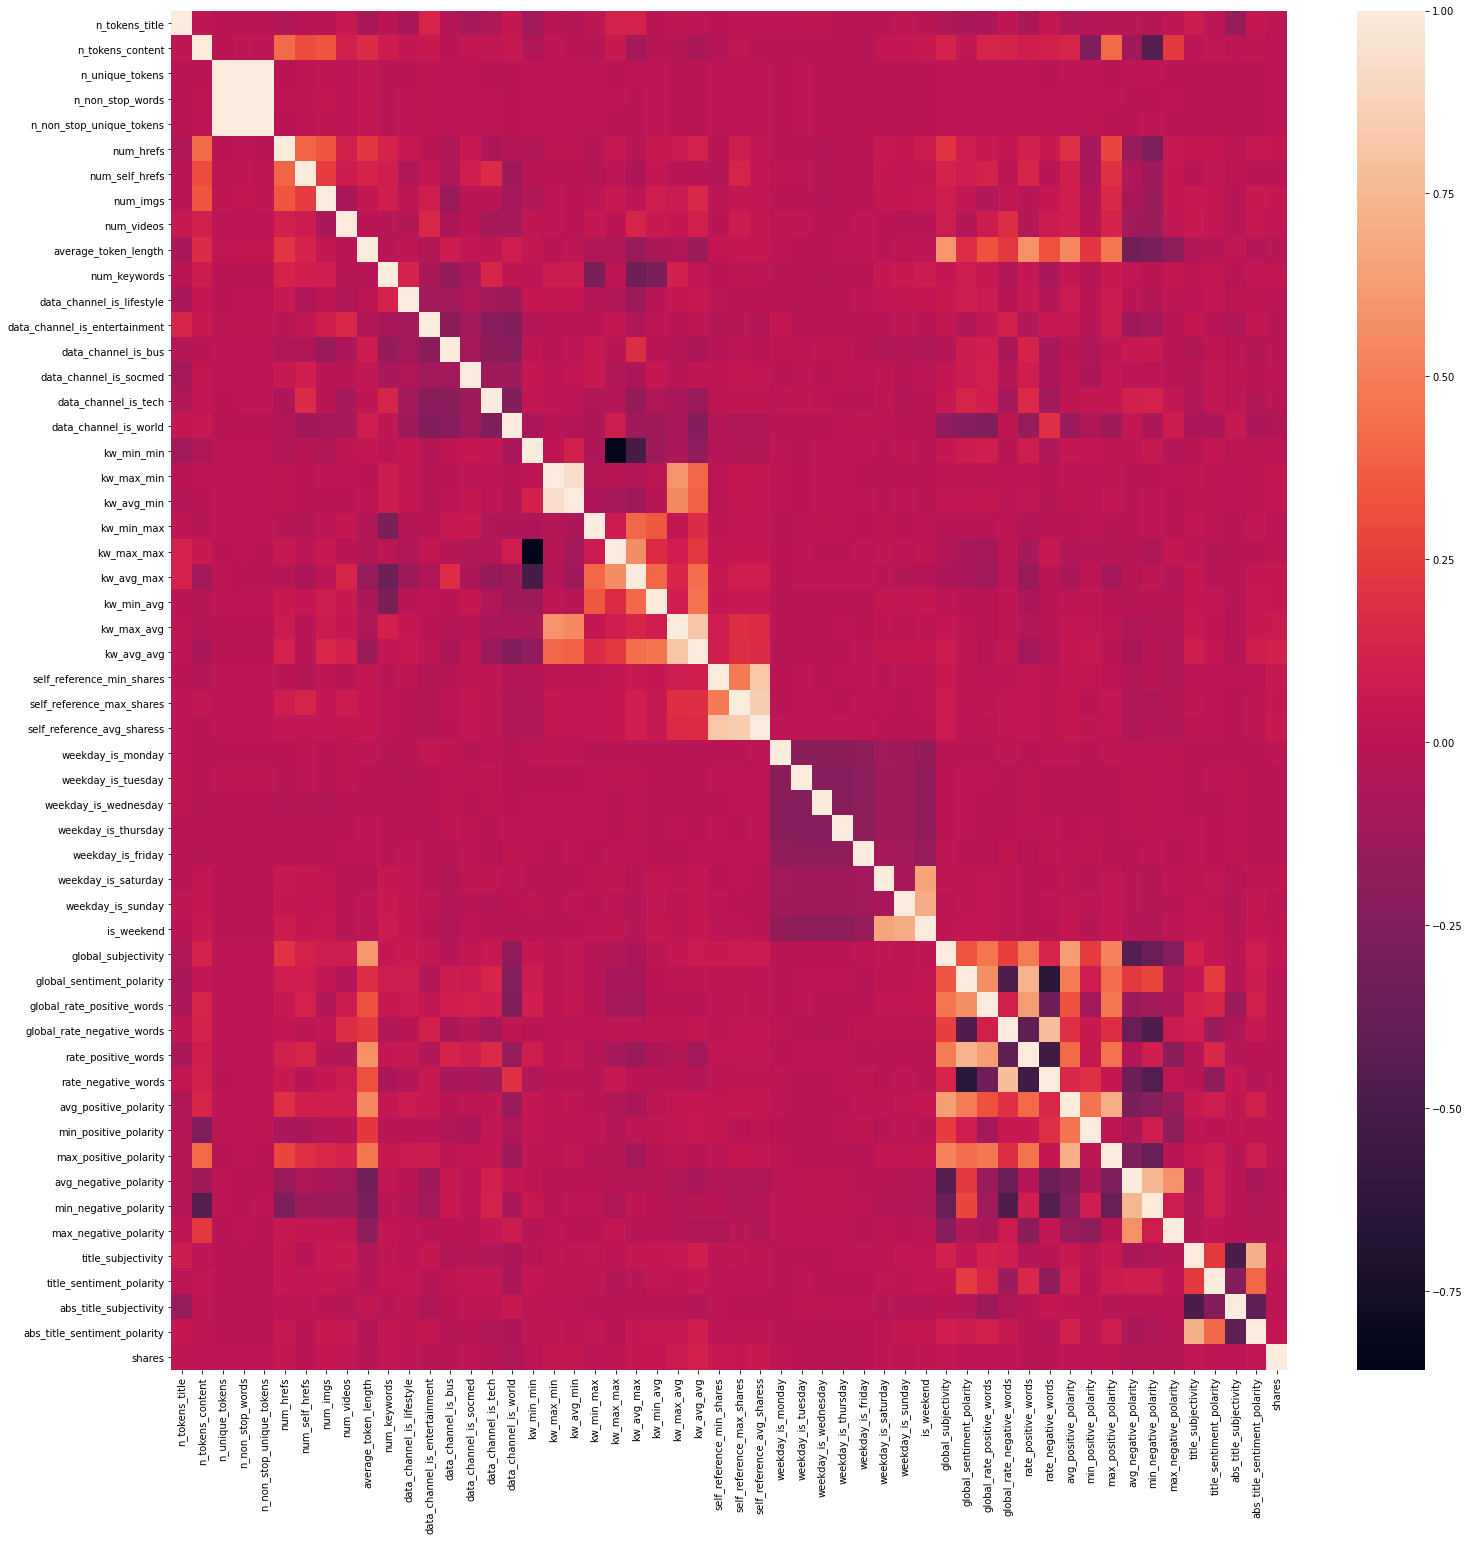

In [6]:
plt.subplots(figsize = (25,25))
sns.heatmap(news.corr())
plt.show()

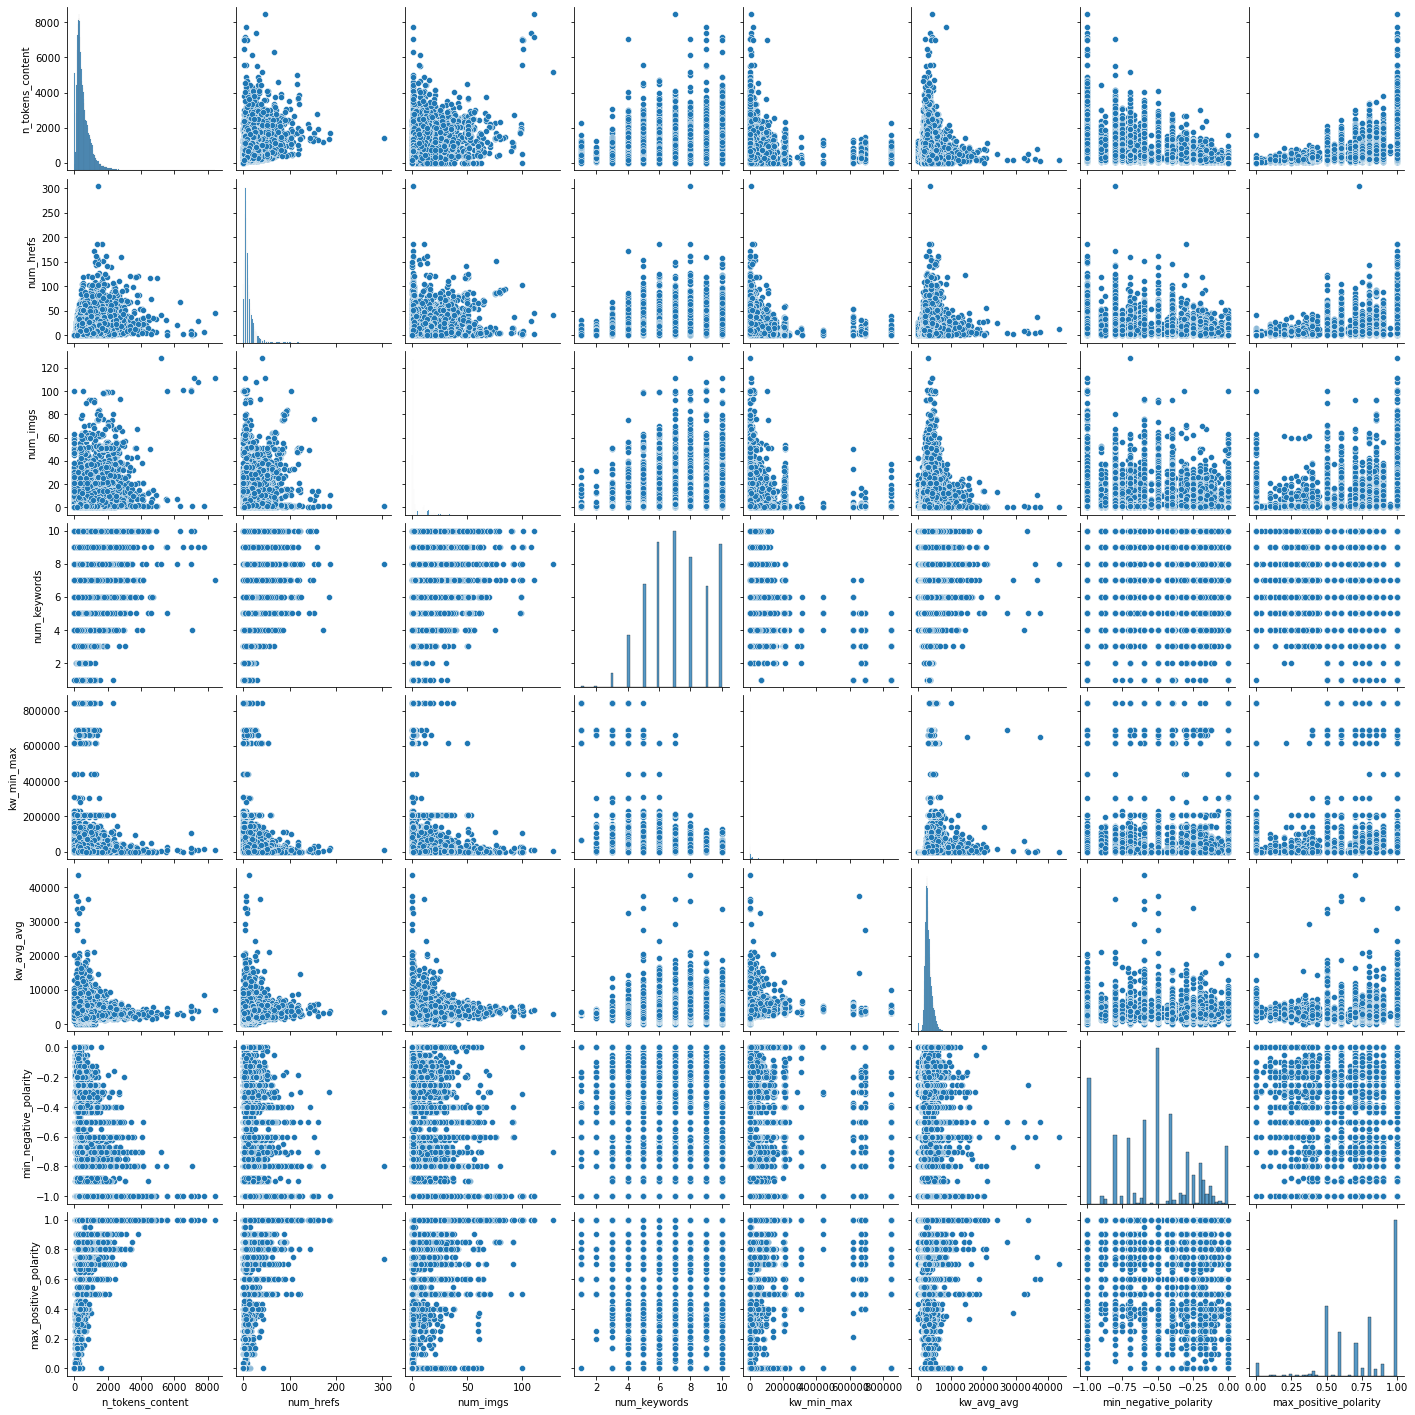

In [7]:
sns.pairplot(news[["n_tokens_content", "num_hrefs", "num_imgs", "num_keywords",
                  "kw_min_max", "kw_avg_avg", "min_negative_polarity","max_positive_polarity"]])

In [8]:
news_corr_sorted = news.corr().unstack().sort_values().drop_duplicates()

In [9]:
news_corr_sorted.head(20)

kw_max_max                  kw_min_min                     -0.857226
rate_negative_words         global_sentiment_polarity      -0.650717
                            rate_positive_words            -0.530962
kw_min_min                  kw_avg_max                     -0.502719
abs_title_subjectivity      title_subjectivity             -0.487172
global_rate_negative_words  min_negative_polarity          -0.478499
                            global_sentiment_polarity      -0.471982
rate_negative_words         min_negative_polarity          -0.452522
min_negative_polarity       n_tokens_content               -0.450603
avg_negative_polarity       global_subjectivity            -0.443187
abs_title_subjectivity      abs_title_sentiment_polarity   -0.400272
global_rate_negative_words  rate_positive_words            -0.398689
min_negative_polarity       max_positive_polarity          -0.360871
global_rate_negative_words  avg_negative_polarity          -0.352242
global_subjectivity         min_ne

In [10]:
news_corr_sorted.tail(20)

avg_negative_polarity         max_negative_polarity        0.580108
kw_max_avg                    kw_max_min                   0.590468
global_subjectivity           average_token_length         0.597629
global_rate_positive_words    rate_positive_words          0.628626
avg_positive_polarity         global_subjectivity          0.631749
weekday_is_saturday           is_weekend                   0.661707
weekday_is_sunday             is_weekend                   0.701648
avg_positive_polarity         max_positive_polarity        0.703558
abs_title_sentiment_polarity  title_subjectivity           0.714528
global_sentiment_polarity     rate_positive_words          0.727827
avg_negative_polarity         min_negative_polarity        0.748896
global_rate_negative_words    rate_negative_words          0.779556
kw_avg_avg                    kw_max_avg                   0.811864
self_reference_avg_sharess    self_reference_min_shares    0.818907
                              self_reference_max

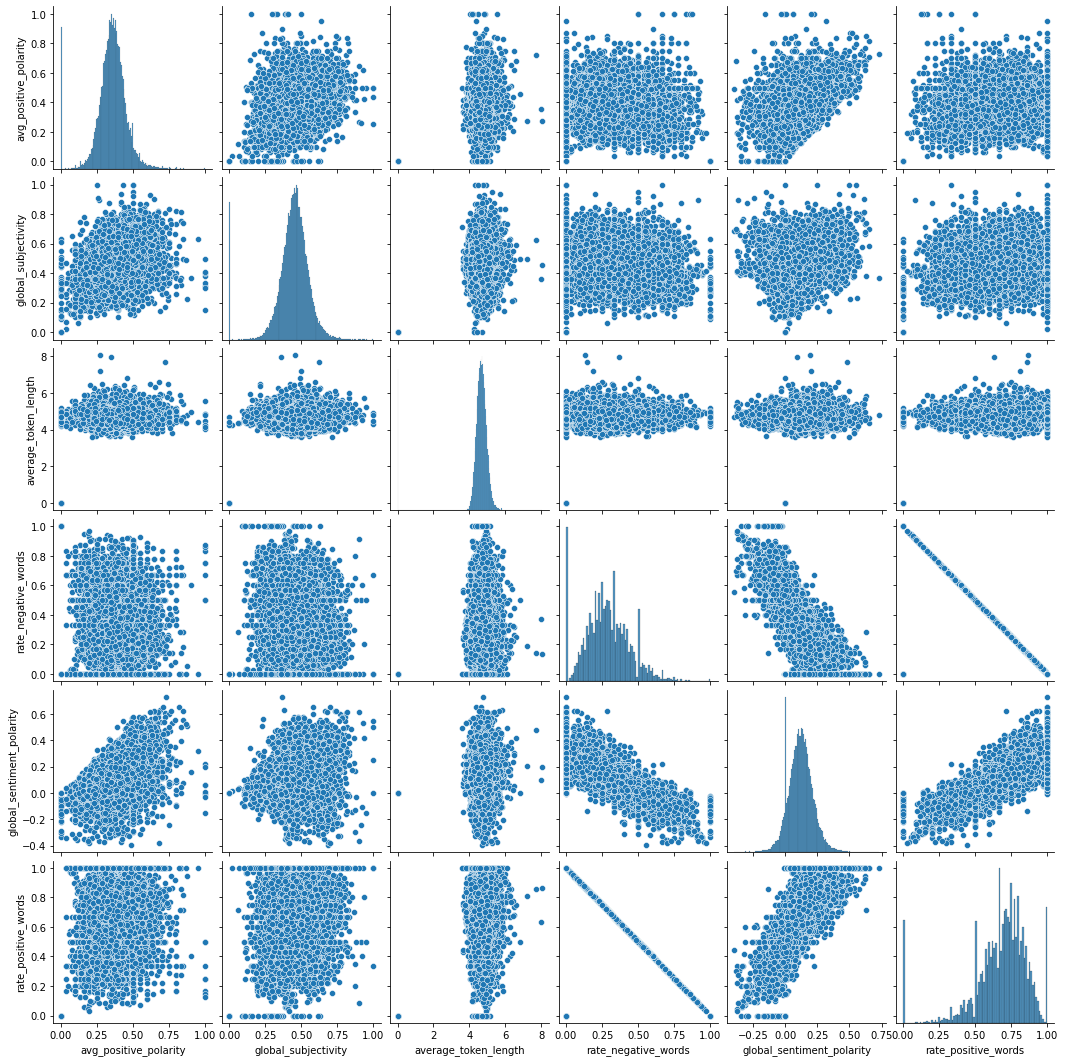

In [11]:
sns.pairplot(news[["avg_positive_polarity", "global_subjectivity", "average_token_length", "rate_negative_words",
                  "global_sentiment_polarity", "rate_positive_words"]])
plt.show()

In [12]:
news_subset = news[["avg_positive_polarity", "global_subjectivity", "average_token_length", "rate_negative_words",
                  "global_sentiment_polarity", "rate_positive_words", "shares_class"]]

In [13]:
news_subset.head()

avg_positive_polarity  global_subjectivity  average_token_length  \
0               0.378636             0.521617              4.680365   
1               0.286915             0.341246              4.913725   
2               0.495833             0.702222              4.393365   
3               0.385965             0.429850              4.404896   
4               0.411127             0.513502              4.682836   

   rate_negative_words  global_sentiment_polarity  rate_positive_words  \
0             0.230769                   0.092562             0.769231   
1             0.266667                   0.148948             0.733333   
2             0.142857                   0.323333             0.857143   
3             0.333333                   0.100705             0.666667   
4             0.139785                   0.281003             0.860215   

  shares_class  
0          low  
1          low  
2       medium  
3       medium  
4          low

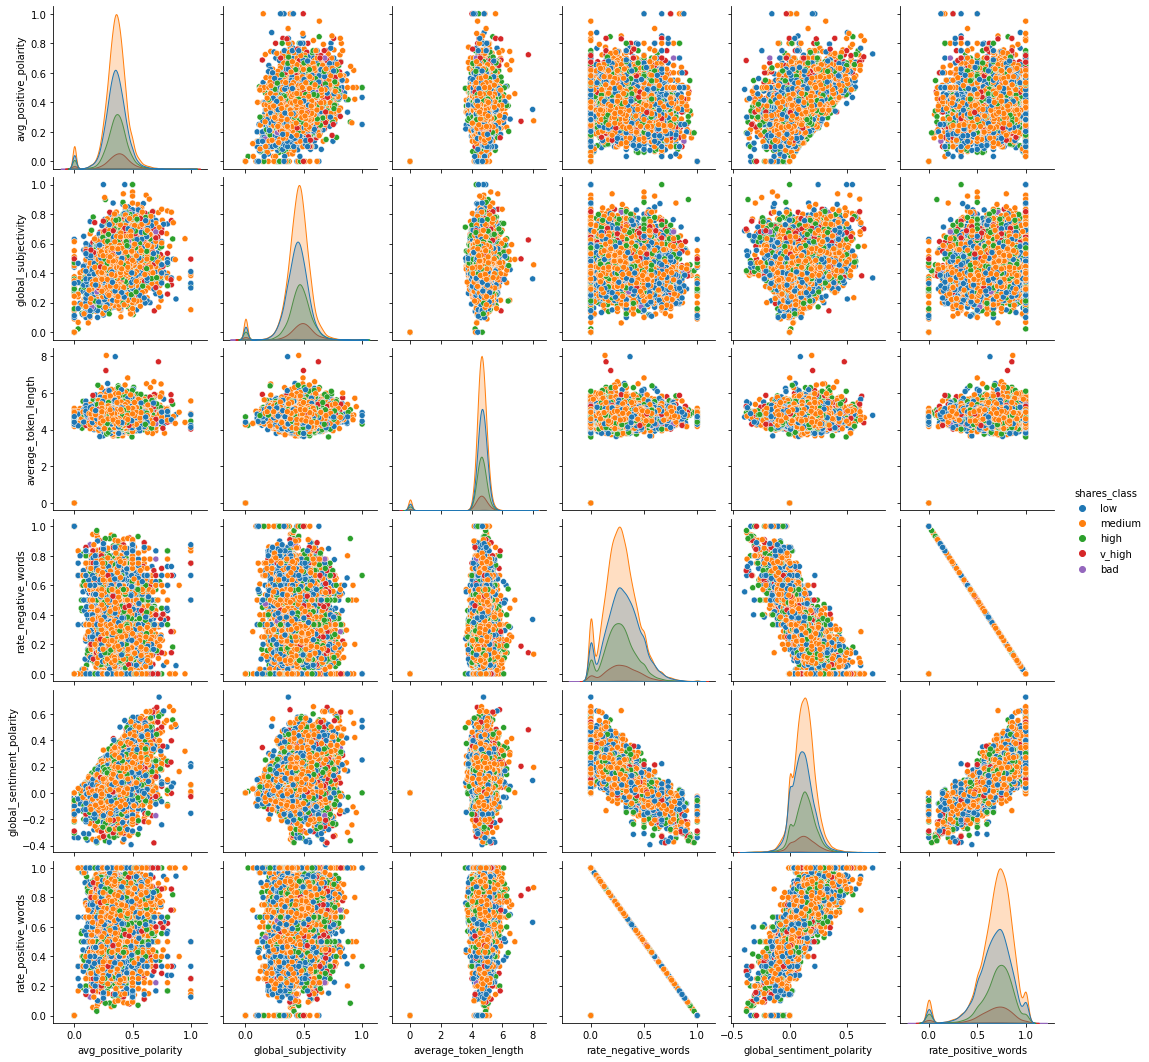

In [14]:
sns.pairplot(news_subset, hue = "shares_class")
plt.show()

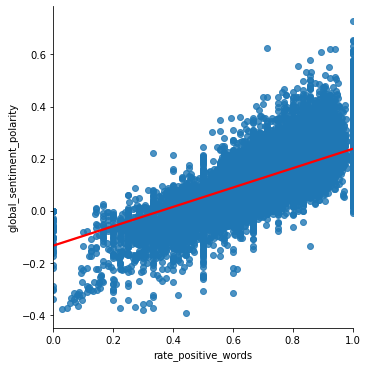

In [15]:
sns.lmplot(x="rate_positive_words", y="global_sentiment_polarity", data=news_subset, line_kws={'color': 'red'})
plt.show()

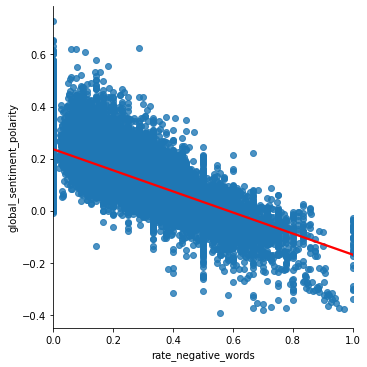

In [16]:
sns.lmplot(x="rate_negative_words", y="global_sentiment_polarity", data=news_subset, line_kws={'color': 'red'})
plt.show()

In [17]:
# Sentiment polarity for an element defines the orientation of the expressed sentiment, 
# i.e., it determines if the text expresses the positive, negative or neutral sentiment of 
# the user about the entity in consideration

In [18]:
pd.DataFrame(news.corr().shares)

shares
n_tokens_title                 0.008783
n_tokens_content               0.002459
n_unique_tokens                0.000806
n_non_stop_words               0.000443
n_non_stop_unique_tokens       0.000114
num_hrefs                      0.045404
num_self_hrefs                -0.001900
num_imgs                       0.039388
num_videos                     0.023936
average_token_length          -0.022007
num_keywords                   0.021818
data_channel_is_lifestyle      0.005831
data_channel_is_entertainment -0.017006
data_channel_is_bus           -0.012376
data_channel_is_socmed         0.005021
data_channel_is_tech          -0.013253
data_channel_is_world         -0.049497
kw_min_min                    -0.001051
kw_max_min                     0.030114
kw_avg_min                     0.030406
kw_min_max                     0.003901
kw_max_max                     0.007863
kw_avg_max                     0.044686
kw_min_avg                     0.039551
kw_max_avg                     0.064306
kw_avg_avg                     0.110413
self_reference_min_shares      0.055958
self_reference_max_shares      0.047115
self_reference_avg_sharess     0.057789
weekday_is_monday              0.009726
weekday_is_tuesday            -0.007941
weekday_is_wednesday          -0.003801
weekday_is_thursday           -0.008833
weekday_is_friday             -0.003884
weekday_is_saturday            0.015082
weekday_is_sunday              0.008230
is_weekend                     0.016958
global_subjectivity            0.031604
global_sentiment_polarity      0.004163
global_rate_positive_words     0.000543
global_rate_negative_words     0.006615
rate_positive_words           -0.013241
rate_negative_words           -0.005183
avg_positive_polarity          0.012142
min_positive_polarity         -0.000040
max_positive_polarity          0.010068
avg_negative_polarity         -0.032029
min_negative_polarity         -0.019297
max_negative_polarity         -0.019300
title_subjectivity             0.021967
title_sentiment_polarity       0.012772
abs_title_subjectivity         0.001481
abs_title_sentiment_polarity   0.027135
shares                         1.000000

## Predictive power score

In [31]:
import ppscore as pps

In [32]:
ps_mat =pps.matrix(news)

In [33]:
ps_mat

x                             y   ppscore            case  \
0     n_tokens_title                n_tokens_title  1.000000  predict_itself   
1     n_tokens_title              n_tokens_content  0.000000      regression   
2     n_tokens_title               n_unique_tokens  0.000000      regression   
3     n_tokens_title              n_non_stop_words  0.000000      regression   
4     n_tokens_title      n_non_stop_unique_tokens  0.000000      regression   
...              ...                           ...       ...             ...   
3020    shares_class      title_sentiment_polarity  0.000000      regression   
3021    shares_class        abs_title_subjectivity  0.000000      regression   
3022    shares_class  abs_title_sentiment_polarity  0.000000      regression   
3023    shares_class                        shares  0.414222      regression   
3024    shares_class                  shares_class  1.000000  predict_itself   

      is_valid_score               metric  baseline_score  model_score  \
0               True                 None        0.000000     1.000000   
1               True  mean absolute error      317.223600   337.706769   
2               True  mean absolute error        0.095578     0.096024   
3               True  mean absolute error        0.032200     0.062388   
4               True  mean absolute error        0.097393     0.099467   
...              ...                  ...             ...          ...   
3020            True  mean absolute error        0.155897     0.178071   
3021            True  mean absolute error        0.159388     0.173647   
3022            True  mean absolute error        0.155874     0.173856   
3023            True  mean absolute error     2555.905400  1497.192429   
3024            True                 None        0.000000     1.000000   

                        model  
0                        None  
1     DecisionTreeRegressor()  
2     DecisionTreeRegressor()  
3     DecisionTreeRegressor()  
4     DecisionTreeRegressor()  
...                       ...  
3020  DecisionTreeRegressor()  
3021  DecisionTreeRegressor()  
3022  DecisionTreeRegressor()  
3023  DecisionTreeRegressor()  
3024                     None  

[3025 rows x 9 columns]

In [83]:
ps_mat_small = ps_mat.loc[ps_mat.ppscore > 0.4]
ps_mat_small.head()

x                              y   ppscore  \
0                    n_tokens_title                 n_tokens_title  1.000000   
56                 n_tokens_content               n_tokens_content  1.000000   
57                 n_tokens_content                n_unique_tokens  0.566947   
58                 n_tokens_content               n_non_stop_words  1.000000   
112                 n_unique_tokens                n_unique_tokens  1.000000   
113                 n_unique_tokens               n_non_stop_words  1.000000   
114                 n_unique_tokens       n_non_stop_unique_tokens  0.509710   
168                n_non_stop_words               n_non_stop_words  1.000000   
174                n_non_stop_words           average_token_length  0.411014   
222        n_non_stop_unique_tokens                n_unique_tokens  0.487351   
223        n_non_stop_unique_tokens               n_non_stop_words  1.000000   
224        n_non_stop_unique_tokens       n_non_stop_unique_tokens  1.000000   
278                       num_hrefs               n_non_stop_words  0.785981   
280                       num_hrefs                      num_hrefs  1.000000   
336                  num_self_hrefs                 num_self_hrefs  1.000000   
392                        num_imgs                       num_imgs  1.000000   
448                      num_videos                     num_videos  1.000000   
498            average_token_length               n_non_stop_words  1.000000   
504            average_token_length           average_token_length  1.000000   
560                    num_keywords                   num_keywords  1.000000   
616       data_channel_is_lifestyle      data_channel_is_lifestyle  1.000000   
672   data_channel_is_entertainment  data_channel_is_entertainment  1.000000   
728             data_channel_is_bus            data_channel_is_bus  1.000000   
784          data_channel_is_socmed         data_channel_is_socmed  1.000000   
840            data_channel_is_tech           data_channel_is_tech  1.000000   
896           data_channel_is_world          data_channel_is_world  1.000000   
952                      kw_min_min                     kw_min_min  1.000000   
1008                     kw_max_min                     kw_max_min  1.000000   
1009                     kw_max_min                     kw_avg_min  0.579863   
1063                     kw_avg_min                     kw_max_min  0.473001   
1064                     kw_avg_min                     kw_avg_min  1.000000   
1120                     kw_min_max                     kw_min_max  1.000000   
1123                     kw_min_max                     kw_min_avg  0.812685   
1172                     kw_max_max                     kw_min_min  0.713123   
1176                     kw_max_max                     kw_max_max  1.000000   
1231                     kw_avg_max                     kw_max_max  0.531641   
1232                     kw_avg_max                     kw_avg_max  1.000000   
1288                     kw_min_avg                     kw_min_avg  1.000000   
1344                     kw_max_avg                     kw_max_avg  1.000000   
1400                     kw_avg_avg                     kw_avg_avg  1.000000   
1456      self_reference_min_shares      self_reference_min_shares  1.000000   
1512      self_reference_max_shares      self_reference_max_shares  1.000000   
1513      self_reference_max_shares     self_reference_avg_sharess  0.543477   
1566     self_reference_avg_sharess      self_reference_min_shares  0.530958   
1567     self_reference_avg_sharess      self_reference_max_shares  0.600272   
1568     self_reference_avg_sharess     self_reference_avg_sharess  1.000000   
1624              weekday_is_monday              weekday_is_monday  1.000000   
1680             weekday_is_tuesday             weekday_is_tuesday  1.000000   
1736           weekday_is_wednesday           weekday_is_wednesday  1.000000   
1792            weekday_is_thursda

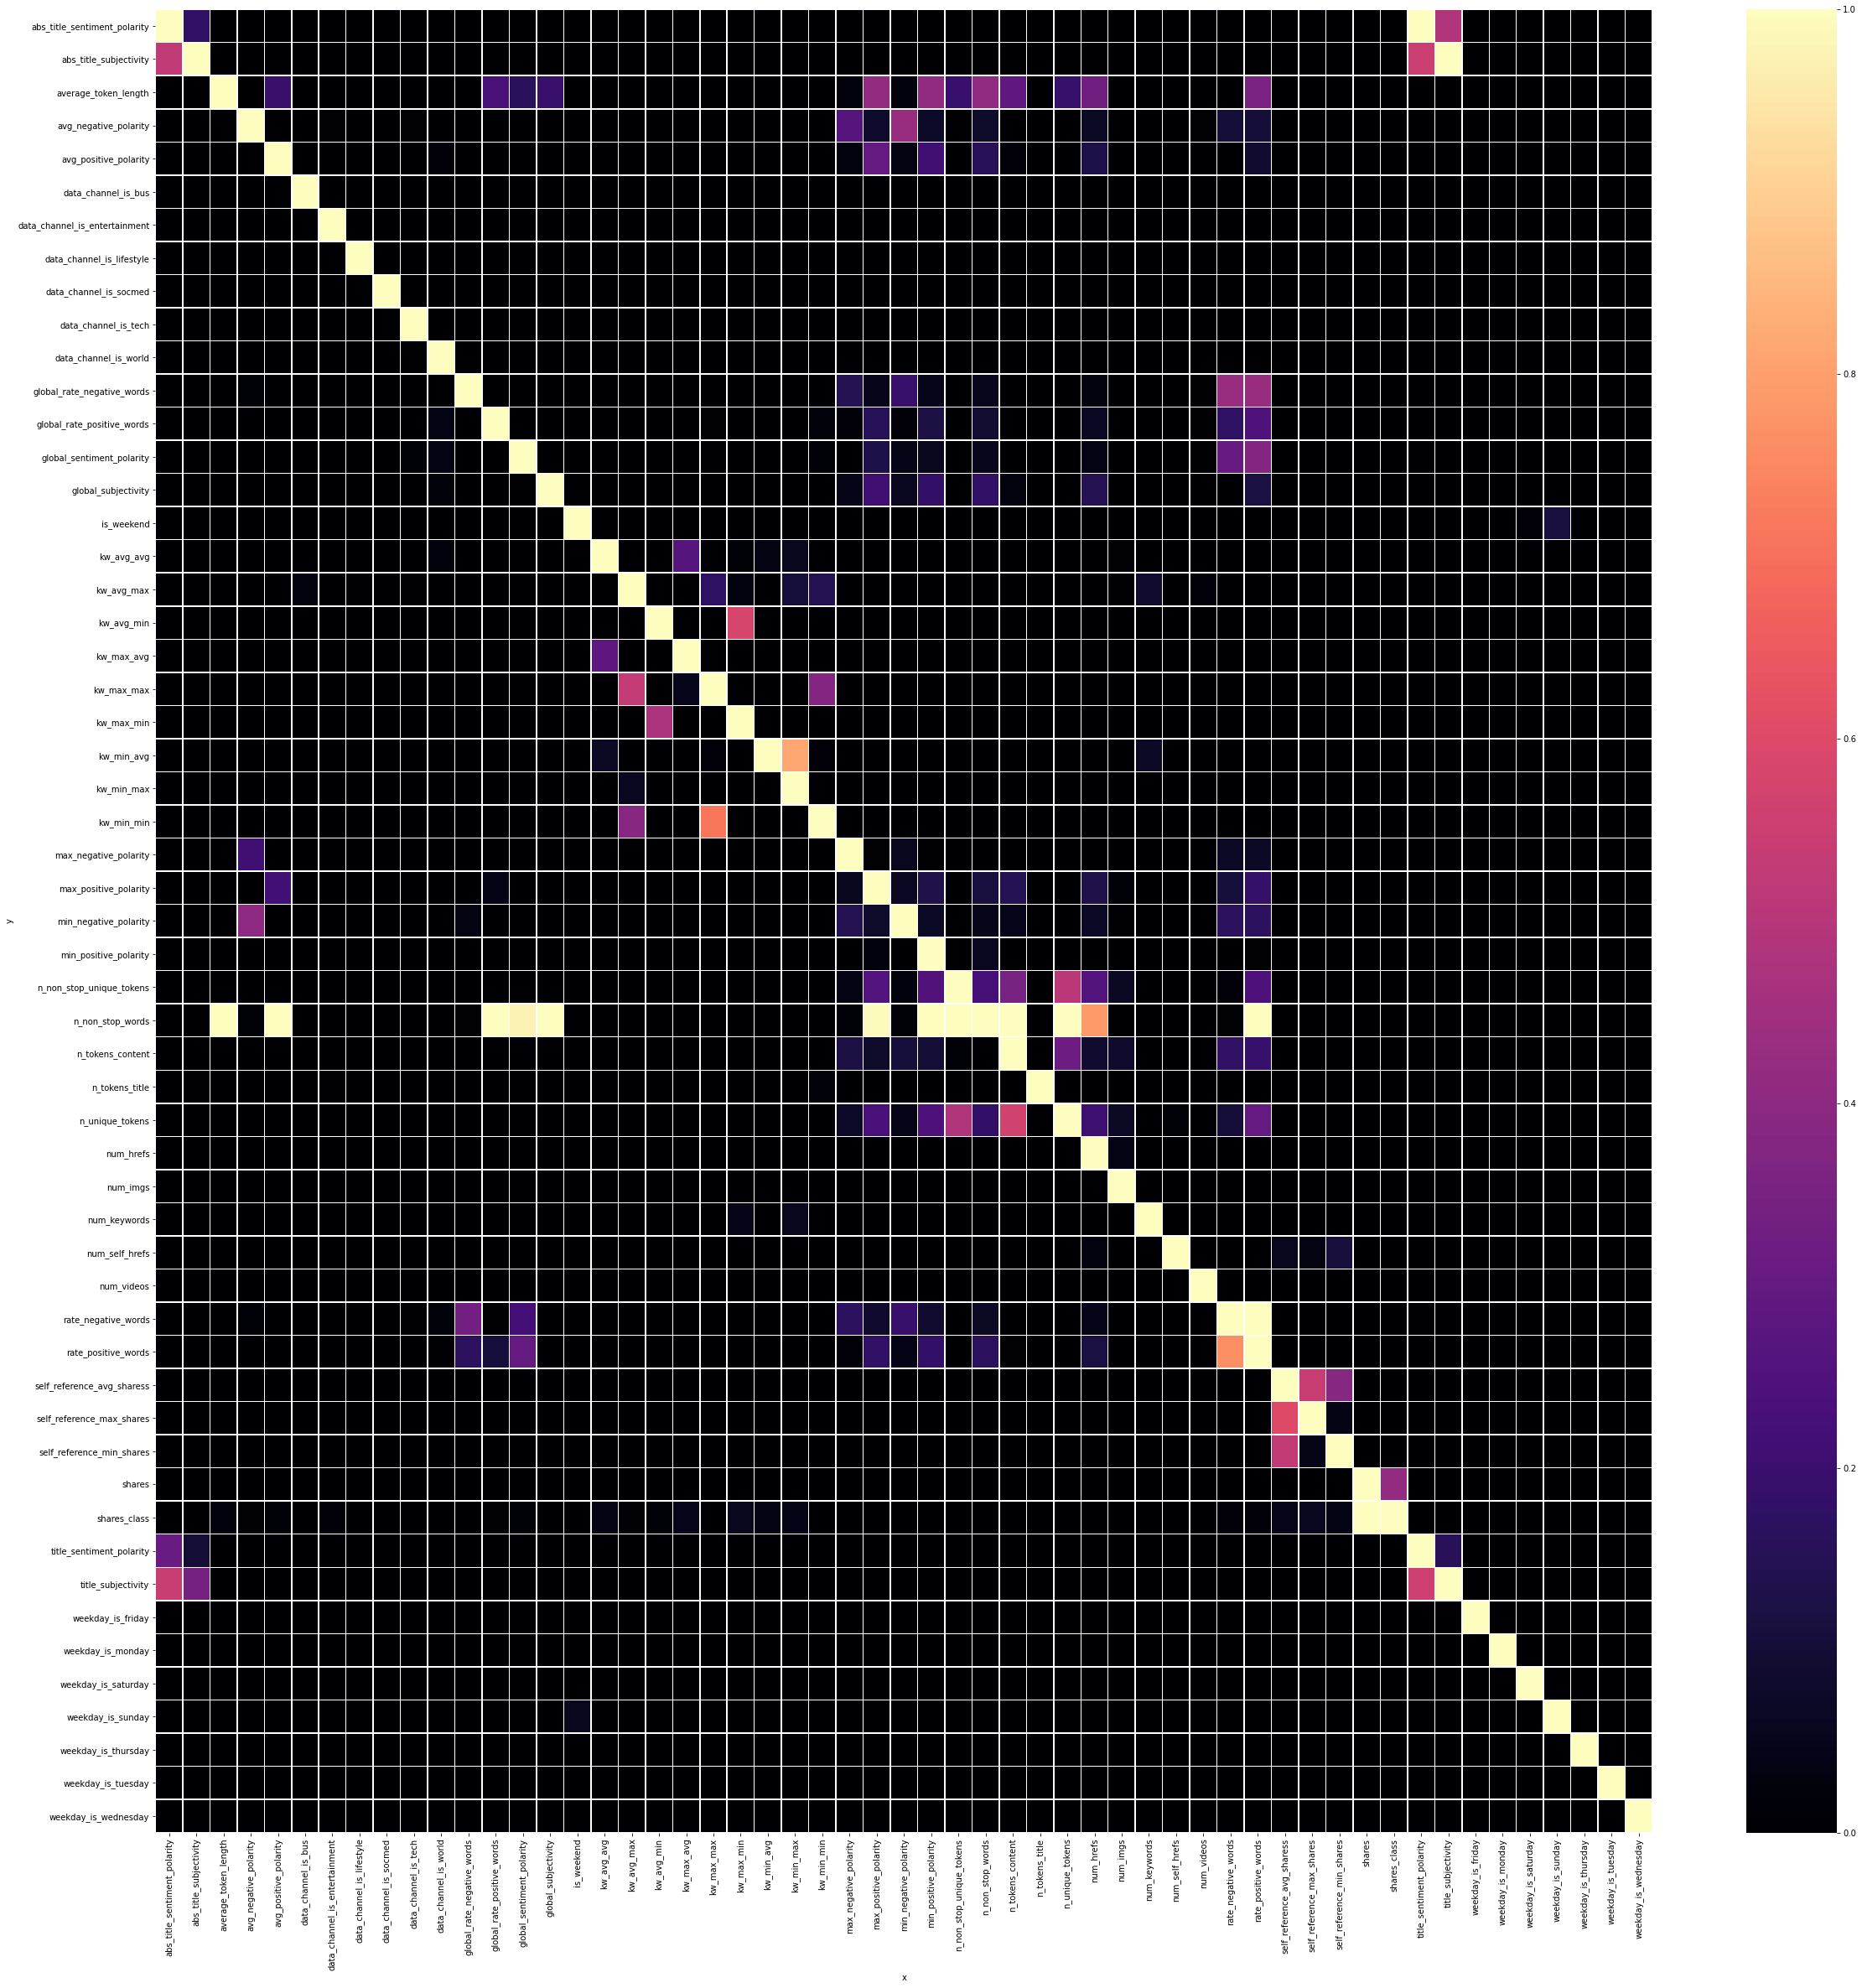

In [34]:
matrix_pps = ps_mat[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')
plt.subplots(figsize = (40,40))

sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="magma",linewidths=0.5)
plt.show()

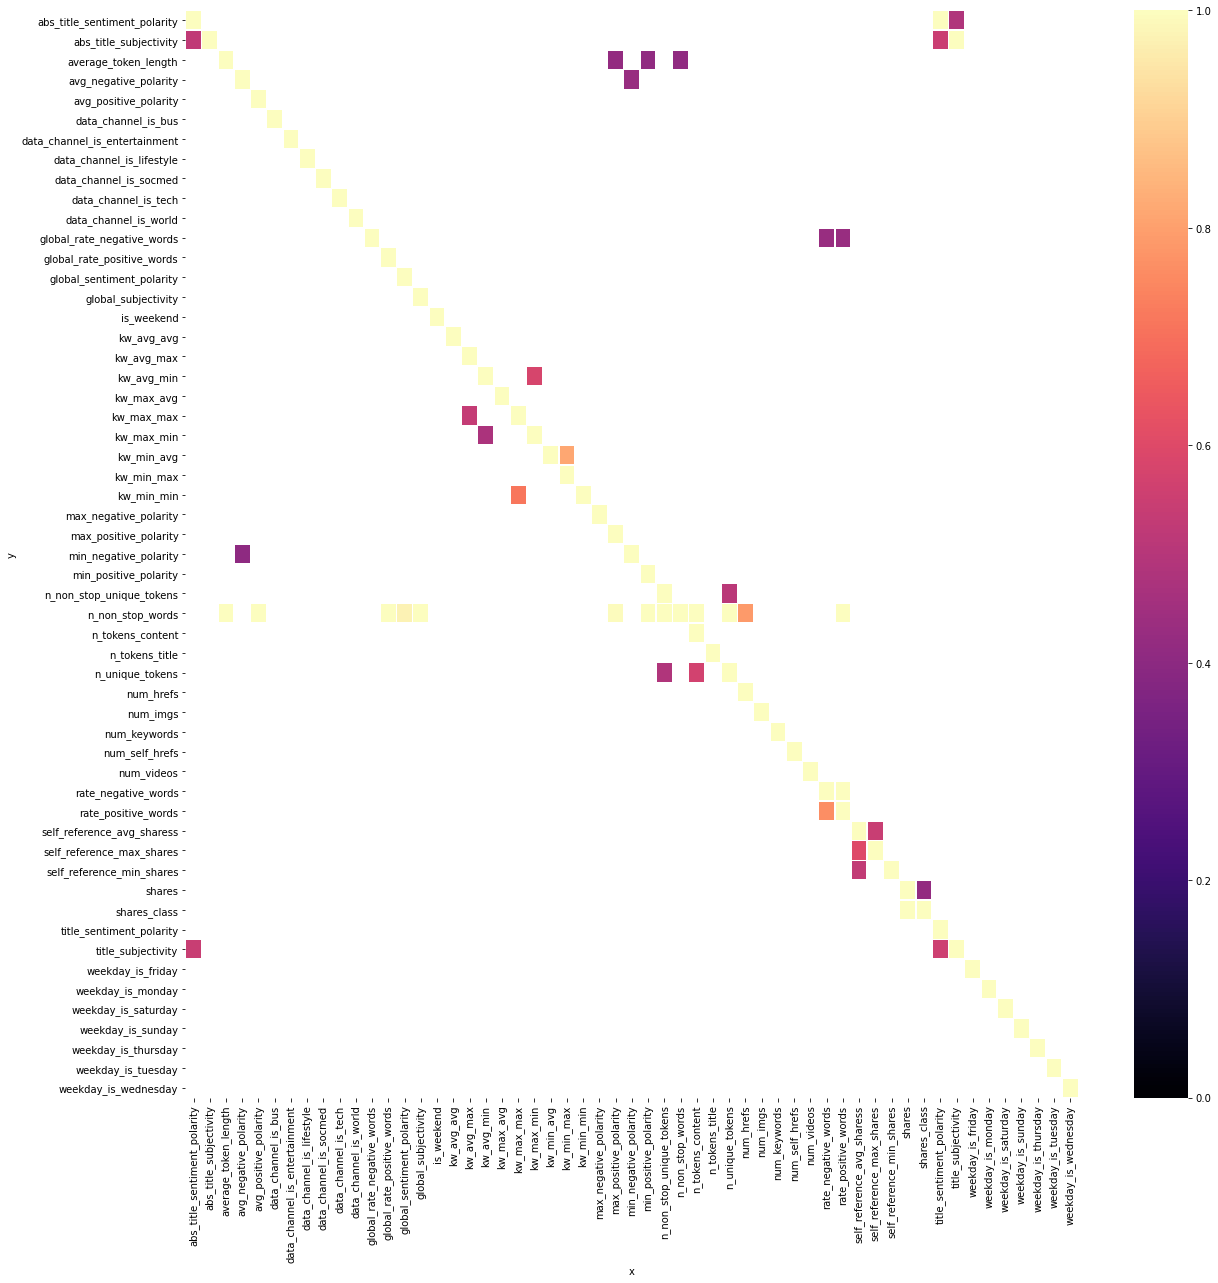

In [46]:
matrix_pps = ps_mat_small[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')
plt.subplots(figsize = (20,20))

sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="magma",linewidths=0.5)
plt.show()

In [19]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

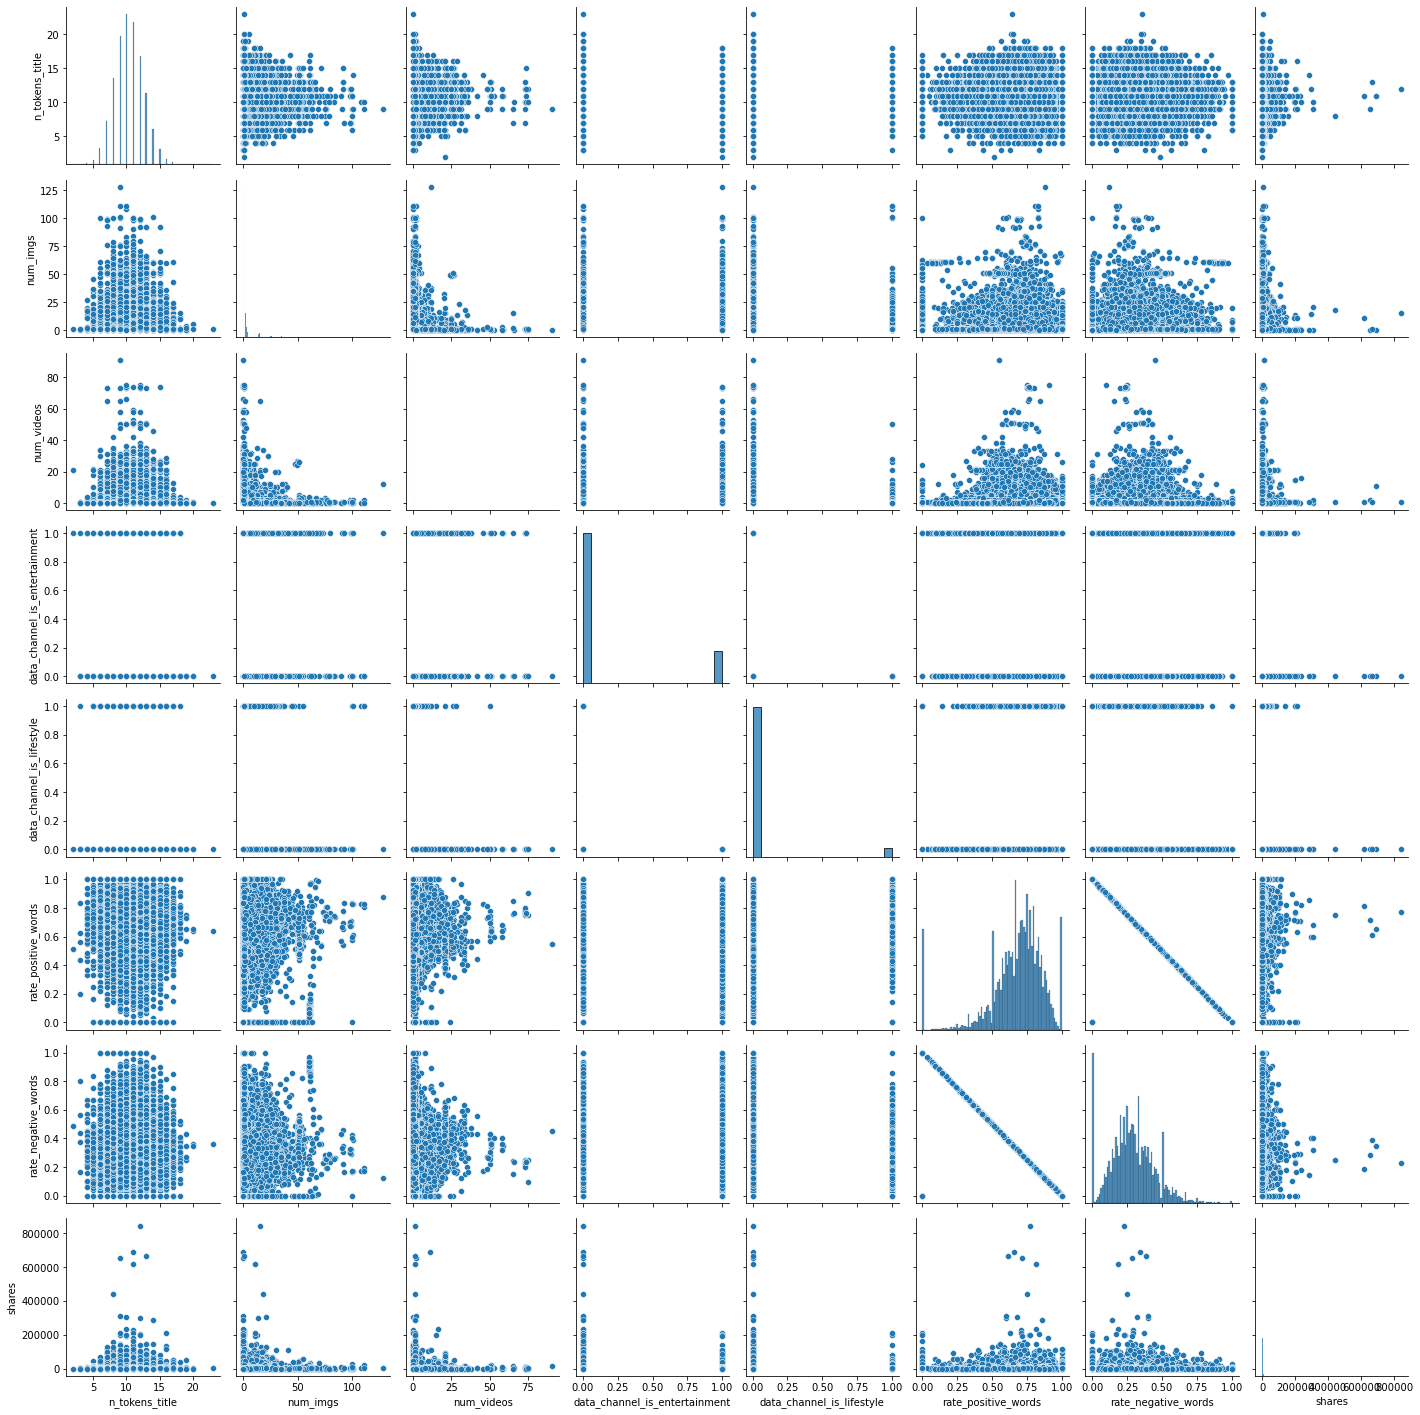

In [20]:
sns.pairplot(news[["n_tokens_title", "num_imgs", "num_videos", "data_channel_is_entertainment",
                  "data_channel_is_lifestyle", "rate_positive_words", "rate_negative_words","shares"]])

# ML

## Defining X and y

In [54]:
news.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.680365  ...                    0.7              -0.350000   
1              4.913725  ...                    0.7              -0.118750   
2              4.393365  ...                    1.0              -0.466667   
3              4.404896  ...                    0.8              -0.369697   
4              4.682836  ...                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_class  
0                      0.187500     593           low  
1                      0.000000     711           low  
2                      0.000000    1500        medium  
3                      0.000000    1200        medium  
4                      0.136364     505           low  

[5 rows x 55 columns]

In [55]:
news_cl = news.drop(["shares"], axis = 1)
news_cl.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares_class  
0                      0.187500           low  
1                      0.000000           low  
2                      0.000000        medium  
3                      0.000000        medium  
4                      0.136364           low  

[5 rows x 54 columns]

In [56]:
X = news_cl.drop("shares_class", axis = 1)
y = news_cl["shares_class"]

In [57]:
X

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
0             0.0              4.680365  ...               0.378636   
1             0.0              4.913725  ...               0.286915   
2             0.0              4.393365  ...               0.495833   
3             0.0              4.404896  ...               0.385965   
4             0.0              4.682836  ...               0.411127   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.333791   
39640        48.0              4.405488  ...               0.374825   
39641         1.0              5.076923  ...               0.307273   
39642         0.0              4.975073  ...               0.236851   
39643         2.0              4.471338  ...               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500            

In [58]:
y

0           low
1           low
2        medium
3        medium
4           low
          ...  
39639    medium
39640    medium
39641    medium
39642    medium
39643    medium
Name: shares_class, Length: 39644, dtype: object

## Splitting dataset into training and test sets

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Scaling data

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Model selection

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [29]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    MultinomialNB()
]

In [30]:
from sklearn.model_selection import cross_validate

In [31]:
for i in classifiers:
    cv_results = cross_validate(i, X_train, y_train, cv = 10, scoring = "accuracy")
    print(i, round(cv_results.get("test_score").mean(), 3))

DecisionTreeClassifier() 0.39
RandomForestClassifier() 0.505
KNeighborsClassifier() 0.425
SVC() 0.501
GaussianNB() 0.24


C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)

  warnings.warn("Estimator fit failed. The score on this trai

MultinomialNB() nan


C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)

  warnings.warn("Estimator fit failed. The score on this trai

In [34]:
RandomForestClassifier()

RandomForestClassifier()

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [85]:
classifiers_2 = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()    
]

In [86]:
for i in classifiers_2:
    cv_results = cross_validate(i, X_train, y_train, cv = 10, scoring = "accuracy")
    print(i, round(cv_results.get("test_score").mean(), 3))

RandomForestClassifier() 0.504
AdaBoostClassifier() 0.486
GradientBoostingClassifier() 0.514


## Grid search

In [70]:
from sklearn.model_selection import GridSearchCV

In [63]:
RandomForestClassifier()

RandomForestClassifier()

In [67]:
parameters = [{"n_estimators": [3,5,8,10,20,30,40,50,75, 100, 200], 
               "criterion": ["gini", "entropy"], 
               "max_depth": [None, 1,2,3]}
            ]

In [72]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring = "accuracy", cv = 5, n_jobs = -1)

In [73]:
grid_search.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3],
                          'n_estimators': [3, 5, 8, 10, 20, 30, 40, 50, 75, 100,
                                           200]}],
             scoring='accuracy')

In [74]:
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print("Accuracy: ", best_accuracy)
print("Best params combination: ", best_params)


Accuracy:  0.5074255084344946
Best params combination:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


## Predictions

In [75]:
grid_search.predict_proba(X_test)

array([[0.005, 0.265, 0.255, 0.435, 0.04 ],
       [0.015, 0.185, 0.425, 0.315, 0.06 ],
       [0.   , 0.185, 0.27 , 0.495, 0.05 ],
       ...,
       [0.   , 0.145, 0.465, 0.365, 0.025],
       [0.   , 0.17 , 0.335, 0.43 , 0.065],
       [0.   , 0.175, 0.29 , 0.48 , 0.055]])

In [76]:
y_pred = grid_search.predict(X_test)

In [77]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0   14   11    0]
 [   0   73  187 1093    2]
 [   0   17  996 1499    1]
 [   0   70  651 2882    1]
 [   0   28   57  341    6]]


In [78]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, \
    classification_report, accuracy_score, f1_score

In [80]:
print("Accuracy: ", accuracy_score(y_test, y_pred))



Accuracy:  0.49905410518350357


In [81]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        25
        high       0.39      0.05      0.09      1355
         low       0.52      0.40      0.45      2513
      medium       0.49      0.80      0.61      3604
      v_high       0.60      0.01      0.03       432

    accuracy                           0.50      7929
   macro avg       0.40      0.25      0.24      7929
weighted avg       0.49      0.50      0.44      7929



C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
